In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random as rand

x_a = []
z_1 = []
z_2 = []
z_3 = []

MC = 10000
ile = 4
for i in range(MC):
    x_a = np.random.rand(ile)
    #print('{0}'.format(x))
    z_1.append(np.sqrt(-np.log(x_a[0]))*np.cos(2*np.pi*x_a[1]))
    z_2.append(np.sqrt(-np.log(x_a[0]))*np.sin(2*np.pi*x_a[1]))
    z_3.append(np.sqrt(-np.log(x_a[2]))*np.cos(2*np.pi*x_a[3]))


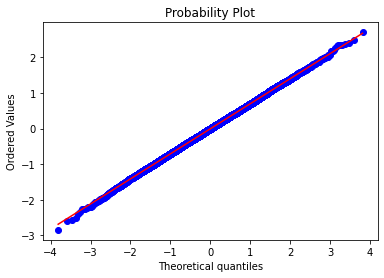

Test Kołmogorow-Smirnov:


0.9982933182077876

In [2]:
# A)
stats.probplot(z_1, plot=plt)
plt.show()
print("Test Kołmogorow-Smirnov:")
s_a,p_a = stats.kstest((z_1-np.mean(z_1))/((np.std(z_1,ddof=1))), 'norm') 
p_a

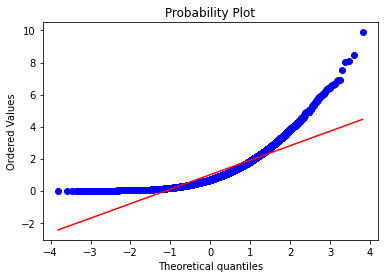

Test Kołmogorow-Smirnov:


9.847131348981132e-223

In [3]:
# B)
# rozkład Chi (dof = 2)
x_b = np.random.chisquare(2, size = MC) 
Z = []
for i in range(MC):
    Z.append(z_1[i]*z_1[i] + z_2[i]*z_2[i])
    
stats.probplot(Z, plot=plt)
plt.show()
print("Test Kołmogorow-Smirnov:")
s_b,p_b = stats.kstest((Z-np.mean(Z))/((np.std(Z,ddof=1))), 'norm') 
p_b

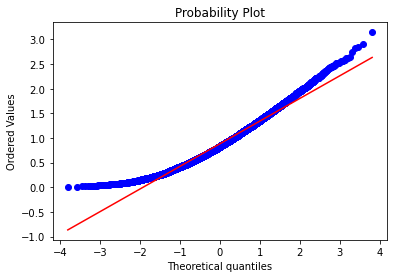

Test Kołmogorow-Smirnov:


3.34330726315986e-22

In [4]:
# C)
# rozkład Rayleigha (sigma = 1)
x_c = np.random.rayleigh(scale=1.0, size = MC)
ZZ = []
for i in range(MC):
    ZZ.append(np.sqrt(Z[i]))

stats.probplot(ZZ, plot=plt)
plt.show()
print("Test Kołmogorow-Smirnov:")
s_c,p_c = stats.kstest((ZZ-np.mean(ZZ))/((np.std(ZZ,ddof=1))), 'norm') 
p_c

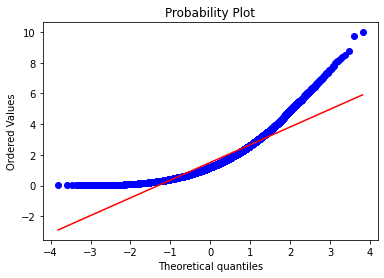

Test Kołmogorow-Smirnov:


7.099670581496057e-110

In [5]:
# D)
# rozkład Chi (dof = 3)
x_d = np.random.chisquare(3, size = MC) 
ZZZ= []
for i in range(MC):
    ZZZ.append(z_1[i]*z_1[i] + z_2[i]*z_2[i]+z_3[i]*z_3[i])
    
stats.probplot(ZZZ, plot=plt)
plt.show()
print("Test Kołmogorow-Smirnov:")
s_d,p_d = stats.kstest((ZZZ-np.mean(ZZZ))/((np.std(ZZZ,ddof=1))), 'norm') 
p_d

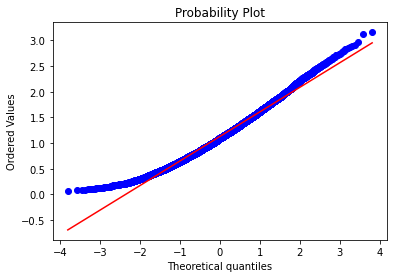

Test Kołmogorow-Smirnov:


1.4414065184348605e-11

In [6]:
# E)
# rozkład Maxwella (sigma = 2)
#x_e = stats.maxwell.rvs(0,2,size = siz)
ZZZZ = []
for i in range(MC):
    ZZZZ.append(np.sqrt(ZZZ[i]))
    
stats.probplot(ZZZZ, plot=plt)
plt.show()
print("Test Kołmogorow-Smirnov:")
s_e,p_e = stats.kstest((ZZZZ-np.mean(ZZZZ))/((np.std(ZZZZ,ddof=1))), 'norm') 
p_e

In [7]:
#ZADANIE 2
# A)
sigma_0 = 1
siz = 50
mr_well = stats.maxwell.rvs(0,sigma_0,size = siz)

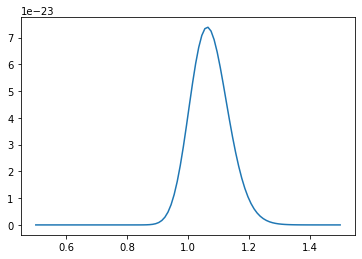

In [8]:
#B)
sigma_2 = np.linspace(0.5,1.5,100)
L = np.zeros(100)
for i in range(100):
    pdf = stats.maxwell.pdf(mr_well,0,sigma_2[i])
    L[i] = np.prod(pdf)
plt.plot(sigma_2,L)

In [9]:
# C)
estymator = sigma_2[np.argmax(L)]

dL = np.diff(np.log(L))
dx = np.diff(sigma_2)
dLdx = dL/dx[0]
dL2 = np.diff(dLdx)
dL2d2x = dL2/dx[0]
niepewnosc = np.sqrt(-1/dL2d2x[np.argmax(L)]) 

print('Estymator najwiekszej wiarygodnosci sigmy wynosi {0:1.5f}.'.format(estymator))
print('Niepewnosc sigmy wynosi {0:1.5f}.'.format(niepewnosc))

Estymator najwiekszej wiarygodnosci sigmy wynosi 1.06566.
Niepewnosc sigmy wynosi 0.06321.


In [10]:
# D)
# Dolne ograniczenie na wariancje estymatora z twierdzenia Cramera-Rao
dL = np.diff(np.log(L))
dx = np.diff(sigma_2)
dLdx = dL/dx[0]   # pierwsza pochodna
dL2 = np.diff(dLdx)
dL2d2x = dL2/dx[0] # druga pochodna
wariancja = -1/dL2d2x[np.argmax(L)]
print('Dolne ograniczenie na wariancje estymatora sigma z twierdzenia Cramera-Rao wynosi {0:1.5f}.'.format(wariancja))

Dolne ograniczenie na wariancje estymatora sigma z twierdzenia Cramera-Rao wynosi 0.00400.


In [11]:
#Zadanie 3
# A)

#dane z zadania 2:
#sigma_0 = 1
#sigma_2 = np.linspace(0.5,1.5,100)
#siz = 50
#mr_well = stats.maxwell.rvs(0,sigma_0,size = siz)

M=1000
W_0 = estymator * estymator # Estymator wariancji sigmy

alpha = 0.2
P1=[]
P2=[]

sigma_2 = np.linspace(0.5,1.5,100)
for lam in range(siz):
    p1 = 0
    p2 = 0
    for monte in range(M):
        well = stats.maxwell.rvs(0,sigma_2[lam],size = siz)
        W = well[lam]*well[lam]
        if W < W_0:
            p1 = p1+1
        else:
            p2 = p2+1
    P1.append(p1/M)
    P2.append(p2/M) 


ValueError: x and y must have same first dimension, but have shapes (100,) and (50,)

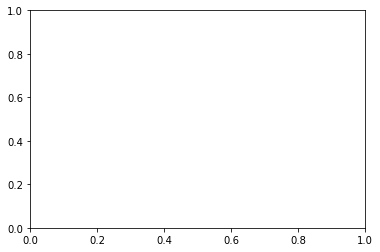

In [12]:
import matplotlib.pyplot as plt

plt.plot(sigma_2, P1, label = 'P(W > W0)')
plt.plot(sigma_2, P2, label = 'P(W < W0)')

plt.plot(sigma_2, [alpha/2] * len(sigma_2))
plt.plot(sigma_2, [1 - alpha/2] * len(sigma_2))
plt.legend()
plt.show()

In [13]:
w_1 = None
w_2 = None

m_1 = None
m_2 = None

test = 0

for v in range(int(len(sigma_2)/2)):
    if w_1 == None and P1[v] <= 1 - alpha/2:
        w_1 = sigma_2[v]
        test += 1

    if m_1 == None and P1[siz - v - 1] >= alpha/2:
        m_1 = sigma_2[siz - v - 1]
        test += 1

    if w_2 == None and P2[v] <= alpha/2:
        w_2 = sigma_2[v]
        test += 1

    if m_2 == None and P2[siz - v - 1] >= 1 - alpha/2:
        m_2 = sigma_2[siz - v - 1]
        test += 1

    if test == 4:
        break

if w_1 == None:
    w_1 = estymator - 2 * niepewnosc

if m_1 == None:
    m_1 = estymator + 2 * niepewnosc

if w_2 == None:
    w_2 = estymator - 2 * niepewnosc

if m_2 == None:
    m_2 = estymator + 2 * niepewnosc

print('Estymator wartosci lambda policzony metoda najwiekszej wiarygodnosci wyniosl {0:1.2f} gdzie jego prawdziwa wartosc to {1:1.0f}, a jego dolne ograniczenie niepewnosci to {2:1.2f}.'.format(estymator, sigma_0, niepewnosc))
print('Referencyjna wartosc roznic wyniosla W0 = {0:4.2f}\n'.format(W_0))

print('Przedzial ufnosci (1 - alfa = {0:1.2f}), dla estymatora wartosci lambda:'.format(1-alpha))
print('Dla W > W0 wynosi [{0:4.2f}, {1:4.2f}]'.format(w_1, m_1)) 

Estymator wartosci lambda policzony metoda najwiekszej wiarygodnosci wyniosl 1.07 gdzie jego prawdziwa wartosc to 1, a jego dolne ograniczenie niepewnosci to 0.06.
Referencyjna wartosc roznic wyniosla W0 = 1.14

Przedzial ufnosci (1 - alfa = 0.80), dla estymatora wartosci lambda:
Dla W > W0 wynosi [0.50, 0.99]
